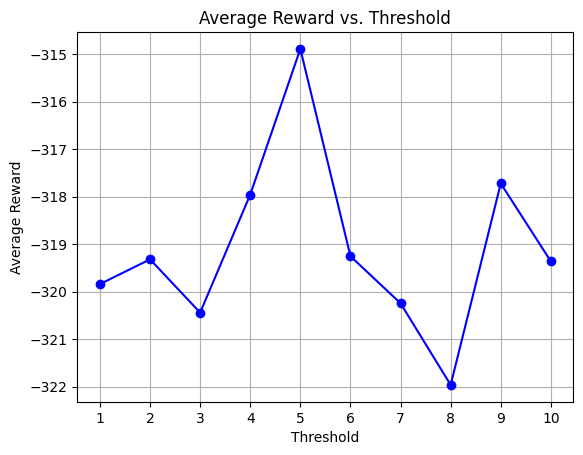

In [1]:
import smdp
import rollouts
import matplotlib.pyplot as plt

episode_length = 50
nr_rollouts = 5000

average_rewards = []
thresholds = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

functions = dict()  # dictionary of threshold policy functions for each threshold
for threshold in thresholds:
    functions[threshold] = lambda state: smdp.threshold_policy(env, threshold=threshold)

functions[1]

for threshold in thresholds:
    env = smdp.SMDP(episode_length)
    average_rewards.append(rollouts.evaluate_policy(env, smdp.threshold_policy, nr_rollouts))

plt.plot(thresholds, average_rewards, marker='o', linestyle='-', color='b')
plt.xlabel('Threshold')
plt.ylabel('Average Reward')
plt.title('Average Reward vs. Threshold')
plt.grid(True)
plt.xticks(thresholds)
plt.show()